In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
train= pd.read_csv('D:\Documents\Desktop\Code\CD\data3.csv')
test= pd.read_csv('D:\Documents\Desktop\Code\CD\data4.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,VOLUME
0,6/2/2012,449.38,449.38,441.60,447.47,13467070
1,7/2/2012,448.37,450.13,443.38,449.31,20244966
2,8/2/2012,452.13,460.98,450.00,460.98,22068580
3,9/2/2012,467.18,467.18,461.49,464.73,27276577
4,10/2/2012,464.25,464.25,456.52,458.23,23972730


In [4]:
#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array which wont
#be considered in scaling
train_open= train.iloc[:, 1:2].values

In [5]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [6]:
train_open_scaled[60]

array([0.46441472])

In [7]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [9]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(1208, 60, 1)

In [10]:
#Building the LSTM Network
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
41/41 [==============================] - 2s 54ms/step - loss: 0.0586
Epoch 2/100
41/41 [==============================] - 2s 54ms/step - loss: 0.0132
Epoch 3/100
41/41 [==============================] - 2s 53ms/step - loss: 0.0108
Epoch 4/100
41/41 [==============================] - 2s 53ms/step - loss: 0.0114
Epoch 5/100
41/41 [==============================] - 2s 54ms/step - loss: 0.0099
Epoch 6/100
41/41 [==============================] - 2s 54ms/step - loss: 0.0090
Epoch 7/100
41/41 [==============================] - 2s 55ms/step - loss: 0.0082
Epoch 8/100
41/41 [==============================] - 2s 54ms/step - loss: 0.0089
Epoch 9/100
41/41 [==============================] - 2s 53ms/step - loss: 0.0078
Epoch 10/100
41/41 [==============================] - 2s 55ms/step - loss: 0.0083
Epoch 11/100
41/41 [==============================] - 2s 57ms/step - loss: 0.0071
Epoch 12/100
41/41 [==============================] - 2s 52ms/step - loss: 0.0069
Epoch 13/100
41/41 [=====

41/41 [==============================] - 2s 54ms/step - loss: 0.0017


In [12]:
#Predicting for test data
test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [38]:
xtest= []
for i in range(60,960):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction
xtest= np.array(xtest)
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [39]:
print(xtest.shape)

(900, 60, 1)


In [40]:
predicted_value= regression.predict(xtest)

In [45]:
predicted_value= ss.inverse_transform(predicted_value)

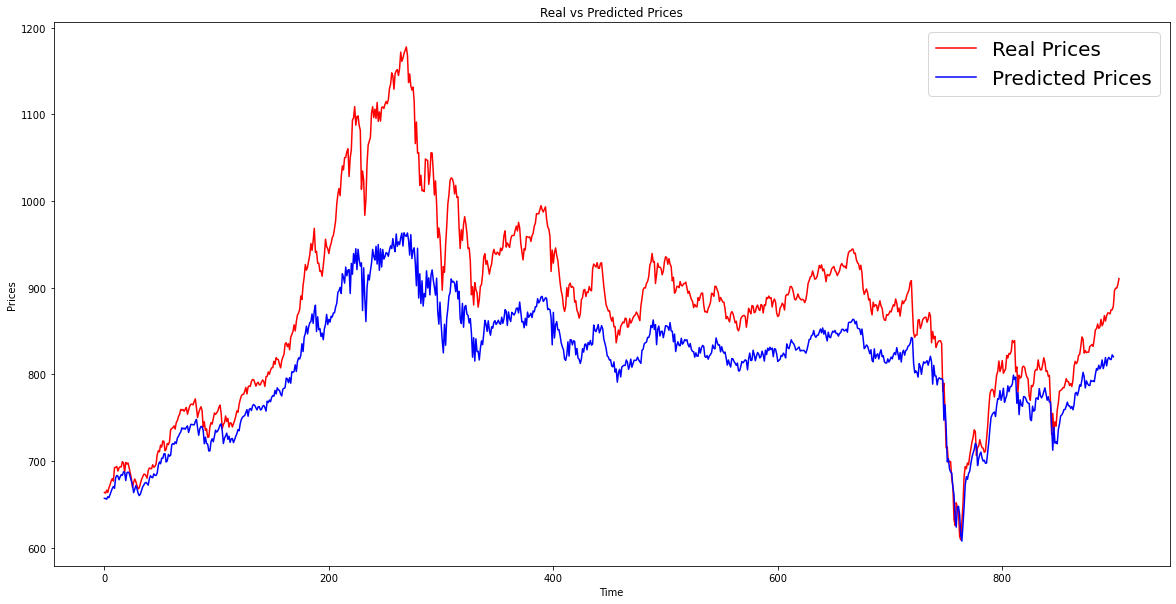

In [44]:
#Plotting the data
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [47]:
from keras.wrappers.scikit_learn import KerasRegressor

In [48]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

In [49]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0938
Epoch 2/50
20/20 [==============================] - 1s 57ms/step - loss: 0.0179
Epoch 3/50
20/20 [==============================] - 1s 58ms/step - loss: 0.0155
Epoch 4/50
20/20 [==============================] - 1s 59ms/step - loss: 0.0123
Epoch 5/50
20/20 [==============================] - 1s 59ms/step - loss: 0.0112
Epoch 6/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0112
Epoch 7/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0097
Epoch 8/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0095
Epoch 9/50
20/20 [==============================] - 1s 62ms/step - loss: 0.0103
Epoch 10/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0102
Epoch 11/50
20/20 [==============================] - 1s 62ms/step - loss: 0.0098
Epoch 12/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0087
Epoch 13/50
20/20 [==================

5/5 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 1/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0610
Epoch 2/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0166
Epoch 3/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0120
Epoch 4/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0107
Epoch 5/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0100
Epoch 6/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0093
Epoch 7/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0090
Epoch 8/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0090
Epoch 9/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0087
Epoch 10/50
20/20 [==============================] - 1s 59ms/step - loss: 0.0076
Epoch 11/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0078
Epoch 12/50
20/20 [==============================] 

5/5 [==============================] - 0s 16ms/step - loss: 0.0024
Epoch 1/50
20/20 [==============================] - 1s 64ms/step - loss: 0.0637
Epoch 2/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0183
Epoch 3/50
20/20 [==============================] - 1s 62ms/step - loss: 0.0125
Epoch 4/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0109
Epoch 5/50
20/20 [==============================] - 1s 62ms/step - loss: 0.0113
Epoch 6/50
20/20 [==============================] - 1s 64ms/step - loss: 0.0112
Epoch 7/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0105
Epoch 8/50
20/20 [==============================] - 1s 62ms/step - loss: 0.0099
Epoch 9/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0090
Epoch 10/50
20/20 [==============================] - 1s 62ms/step - loss: 0.0080
Epoch 11/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0084
Epoch 12/50
20/20 [==============================] 

31/31 [==============================] - 2s 54ms/step - loss: 0.0067
Epoch 24/25
31/31 [==============================] - 2s 56ms/step - loss: 0.0066
Epoch 25/25
8/8 [==============================] - 0s 13ms/step - loss: 0.0165
Epoch 1/25
31/31 [==============================] - 2s 56ms/step - loss: 0.0429: 0s - lo
Epoch 2/25
31/31 [==============================] - 2s 54ms/step - loss: 0.0216
Epoch 3/25
31/31 [==============================] - 2s 55ms/step - loss: 0.0202
Epoch 4/25
31/31 [==============================] - 2s 56ms/step - loss: 0.0147
Epoch 5/25
31/31 [==============================] - 2s 55ms/step - loss: 0.0153
Epoch 6/25
31/31 [==============================] - 2s 56ms/step - loss: 0.0122
Epoch 7/25
31/31 [==============================] - 2s 56ms/step - loss: 0.0123
Epoch 8/25
31/31 [==============================] - 2s 56ms/step - loss: 0.0112
Epoch 9/25
31/31 [==============================] - 2s 56ms/step - loss: 0.0099
Epoch 10/25
31/31 [=======================

20/20 [==============================] - 1s 60ms/step - loss: 0.0091
Epoch 21/50
20/20 [==============================] - 1s 59ms/step - loss: 0.0094
Epoch 22/50
20/20 [==============================] - 1s 58ms/step - loss: 0.0089
Epoch 23/50
20/20 [==============================] - 1s 58ms/step - loss: 0.0091
Epoch 24/50
20/20 [==============================] - 1s 57ms/step - loss: 0.0081
Epoch 25/50
20/20 [==============================] - 1s 58ms/step - loss: 0.0076
Epoch 26/50
20/20 [==============================] - 1s 57ms/step - loss: 0.0075
Epoch 27/50
20/20 [==============================] - 1s 56ms/step - loss: 0.0082
Epoch 28/50
20/20 [==============================] - 1s 57ms/step - loss: 0.0076
Epoch 29/50
20/20 [==============================] - 1s 59ms/step - loss: 0.0067
Epoch 30/50
20/20 [==============================] - 1s 57ms/step - loss: 0.0074
Epoch 31/50
20/20 [==============================] - 1s 57ms/step - loss: 0.0068
Epoch 32/50
20/20 [=====================

20/20 [==============================] - 1s 63ms/step - loss: 0.0090
Epoch 20/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0083
Epoch 21/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0086
Epoch 22/50
20/20 [==============================] - 1s 59ms/step - loss: 0.0061: 0s
Epoch 23/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0086
Epoch 24/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0069
Epoch 25/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0073
Epoch 26/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0068
Epoch 27/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0066
Epoch 28/50
20/20 [==============================] - 1s 59ms/step - loss: 0.0072
Epoch 29/50
20/20 [==============================] - 1s 59ms/step - loss: 0.0061
Epoch 30/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0059
Epoch 31/50
20/20 [=================

20/20 [==============================] - 1s 67ms/step - loss: 0.0086
Epoch 19/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0089
Epoch 20/50
20/20 [==============================] - 1s 62ms/step - loss: 0.0081
Epoch 21/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0079
Epoch 22/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0081
Epoch 23/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0076
Epoch 24/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0068
Epoch 25/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0076
Epoch 26/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0075
Epoch 27/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0065
Epoch 28/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0065
Epoch 29/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0064
Epoch 30/50
20/20 [=====================

20/20 [==============================] - 1s 62ms/step - loss: 0.0130
Epoch 18/50
20/20 [==============================] - 1s 67ms/step - loss: 0.0128
Epoch 19/50
20/20 [==============================] - 1s 68ms/step - loss: 0.0122
Epoch 20/50
20/20 [==============================] - 1s 66ms/step - loss: 0.0123
Epoch 21/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0122
Epoch 22/50
20/20 [==============================] - 1s 66ms/step - loss: 0.0117
Epoch 23/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0120
Epoch 24/50
20/20 [==============================] - 1s 64ms/step - loss: 0.0120
Epoch 25/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0113
Epoch 26/50
20/20 [==============================] - 1s 66ms/step - loss: 0.0124
Epoch 27/50
20/20 [==============================] - 1s 72ms/step - loss: 0.0122
Epoch 28/50
20/20 [==============================] - 1s 66ms/step - loss: 0.0119
Epoch 29/50
20/20 [=====================

20/20 [==============================] - 1s 61ms/step - loss: 0.0155
Epoch 17/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0139
Epoch 18/50
20/20 [==============================] - 1s 67ms/step - loss: 0.0123
Epoch 19/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0115
Epoch 20/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0112
Epoch 21/50
20/20 [==============================] - 1s 63ms/step - loss: 0.0111
Epoch 22/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0114
Epoch 23/50
20/20 [==============================] - 1s 66ms/step - loss: 0.0104
Epoch 24/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0109
Epoch 25/50
20/20 [==============================] - 1s 72ms/step - loss: 0.0102
Epoch 26/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0103
Epoch 27/50
20/20 [==============================] - 1s 62ms/step - loss: 0.0100
Epoch 28/50
20/20 [=====================

20/20 [==============================] - 1s 73ms/step - loss: 0.4144
Epoch 16/50
20/20 [==============================] - 1s 72ms/step - loss: 0.4114
Epoch 17/50
20/20 [==============================] - 1s 73ms/step - loss: 0.4077
Epoch 18/50
20/20 [==============================] - 1s 72ms/step - loss: 0.4043
Epoch 19/50
20/20 [==============================] - 1s 72ms/step - loss: 0.4014
Epoch 20/50
20/20 [==============================] - 2s 80ms/step - loss: 0.3969
Epoch 21/50
20/20 [==============================] - 2s 75ms/step - loss: 0.3953
Epoch 22/50
20/20 [==============================] - 2s 75ms/step - loss: 0.3918
Epoch 23/50
20/20 [==============================] - 2s 78ms/step - loss: 0.3857
Epoch 24/50
20/20 [==============================] - 2s 80ms/step - loss: 0.3839
Epoch 25/50
20/20 [==============================] - 2s 76ms/step - loss: 0.3789
Epoch 26/50
20/20 [==============================] - 2s 75ms/step - loss: 0.3750
Epoch 27/50
20/20 [=====================

20/20 [==============================] - 1s 59ms/step - loss: 0.3098
Epoch 15/50
20/20 [==============================] - 1s 58ms/step - loss: 0.3086
Epoch 16/50
20/20 [==============================] - 1s 59ms/step - loss: 0.3046
Epoch 17/50
20/20 [==============================] - 1s 58ms/step - loss: 0.3005
Epoch 18/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2966
Epoch 19/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2929
Epoch 20/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2900
Epoch 21/50
20/20 [==============================] - 1s 58ms/step - loss: 0.2856
Epoch 22/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2799
Epoch 23/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2767
Epoch 24/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2748
Epoch 25/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2685
Epoch 26/50
20/20 [=====================

20/20 [==============================] - 1s 59ms/step - loss: 0.2967
Epoch 14/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2929
Epoch 15/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2925
Epoch 16/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2894
Epoch 17/50
20/20 [==============================] - 1s 60ms/step - loss: 0.2862
Epoch 18/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2849
Epoch 19/50
20/20 [==============================] - 1s 58ms/step - loss: 0.2819
Epoch 20/50
20/20 [==============================] - 1s 60ms/step - loss: 0.2785
Epoch 21/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2757
Epoch 22/50
20/20 [==============================] - 1s 59ms/step - loss: 0.2739
Epoch 23/50
20/20 [==============================] - 1s 64ms/step - loss: 0.2697
Epoch 24/50
20/20 [==============================] - 1s 72ms/step - loss: 0.2685
Epoch 25/50
20/20 [=====================

In [50]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/50
25/25 [==============================] - 2s 64ms/step - loss: 0.0680
Epoch 2/50
25/25 [==============================] - 2s 65ms/step - loss: 0.0158
Epoch 3/50
25/25 [==============================] - 2s 67ms/step - loss: 0.0113
Epoch 4/50
25/25 [==============================] - 2s 67ms/step - loss: 0.0110
Epoch 5/50
25/25 [==============================] - 2s 65ms/step - loss: 0.0101
Epoch 6/50
25/25 [==============================] - 2s 67ms/step - loss: 0.0096
Epoch 7/50
25/25 [==============================] - 2s 67ms/step - loss: 0.0094
Epoch 8/50
25/25 [==============================] - 2s 67ms/step - loss: 0.0091
Epoch 9/50
25/25 [==============================] - 2s 66ms/step - loss: 0.0085
Epoch 10/50
25/25 [==============================] - 2s 68ms/step - loss: 0.0081
Epoch 11/50
25/25 [==============================] - 2s 67ms/step - loss: 0.0086
Epoch 12/50
25/25 [==============================] - 2s 66ms/step - loss: 0.0075
Epoch 13/50
25/25 [==================

In [51]:
model

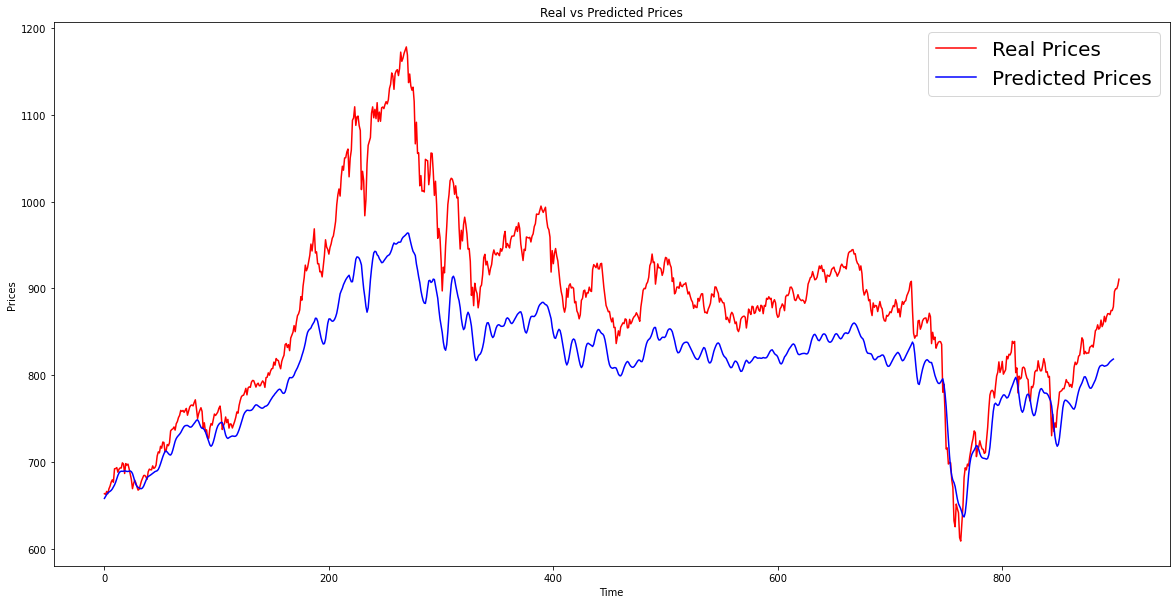

In [52]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

ValueError: x and y must have same first dimension, but have shapes (363,) and (905, 1)

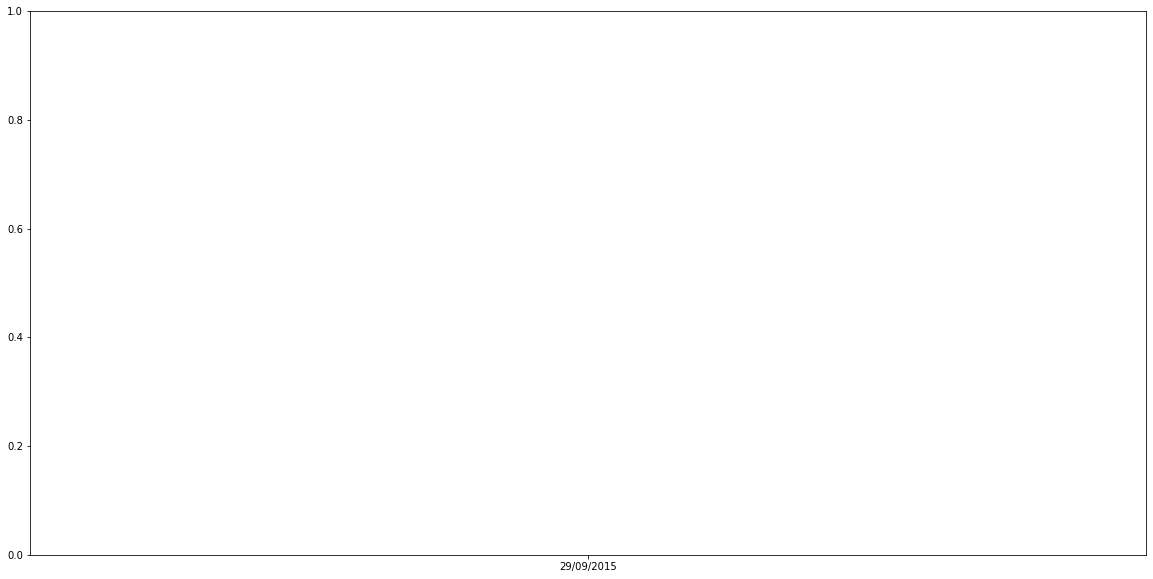

In [65]:
plt.figure(figsize=(20,10))
plt.plot(train.loc[905:,'Date'],test_open,'red',label='Real Prices')
plt.plot(train.loc[905:,'Date'],predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)